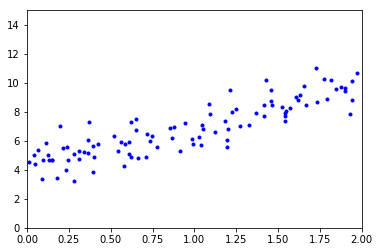

[[4.21509616]
 [2.77011339]]

[[4.21509616]
 [9.75532293]]


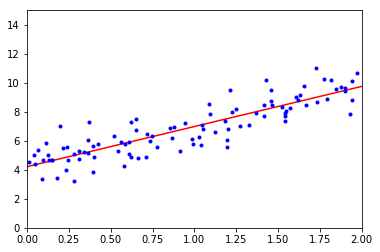

[4.21509616] [[2.77011339]]
[[4.21509616]
 [9.75532293]]

[[4.21509616]
 [2.77011339]]


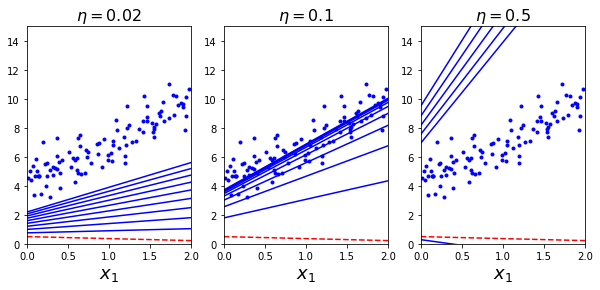

[[4.21076011]
 [2.74856079]]


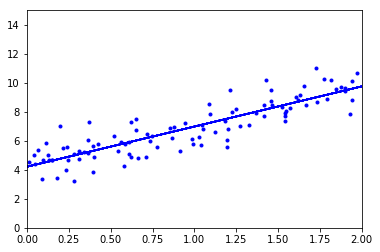

[4.16782089] [2.72603052]
[-0.75275929]
[-0.75275929  0.56664654]

[1.78134581] [[0.93366893 0.56456263]]
['x0', 'x0^2']


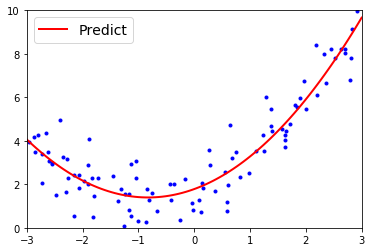

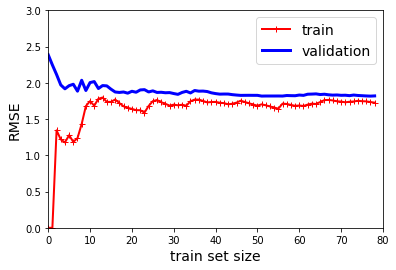

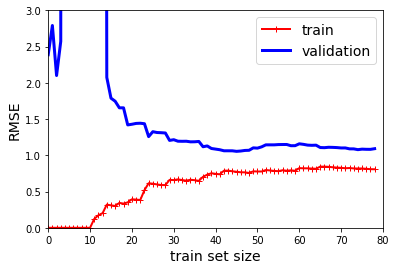

[[1.55071465]]
[1.13500145]
[1.54333232]
239 SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.0005, fit_intercept=True, l1_ratio=0.15,
       learning_rate='constant', loss='squared_loss', max_iter=1,
       n_iter=None, n_iter_no_change=5, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=True)


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.base import clone



def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

def learning_schedule(t):
    return t0 / (t + t1)

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="validation")
    plt.legend(loc="upper right", fontsize=14)
    plt.xlabel("train set size", fontsize=14)
    plt.ylabel("RMSE", fontsize=14)

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

if __name__=="__main__":  
    
    np.random.seed(42)
    X = 2*np.random.rand(100,1)
    y = 4 + 3*X+np.random.randn(100,1)
    
    plt.plot(X,y,"b.")
    plt.axis([0,2,0,15])
    plt.show()
    
    X_b = np.c_[np.ones((100,1)),X]
    theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
    print(theta_best)
    
    print()
    
    X_new = np.array([[0],[2]])
    X_new_b = np.c_[np.ones((2,1)),X_new]
    y_predict = X_new_b.dot(theta_best)
    print(y_predict)
    
    plt.plot(X_new, y_predict, "r-")
    plt.plot(X,y,"b.")
    plt.axis([0,2,0,15])
    plt.show()
    
    lin_reg = LinearRegression()
    lin_reg.fit(X,y)
    print(lin_reg.intercept_, lin_reg.coef_)
    print(lin_reg.predict(X_new))
    
    print()
    
    learning_rate = 0.1
    n_iterations = 1000
    m = 100
    
    theta = np.random.randn(2,1)
    
    for iteration in range(n_iterations):
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - learning_rate * gradients
        
    print(theta)
    
    np.random.seed(42)
    theta = np.random.randn(2,1)
    theta_path_bgd = []
    plt.figure(figsize = (10,4))
    plt.subplot(131); plot_gradient_descent(theta, eta= 0.02)
    plt.subplot(132); plot_gradient_descent(theta, eta= 0.1, theta_path = theta_path_bgd)
    plt.subplot(133); plot_gradient_descent(theta, eta= 0.5)
    plt.show()
    
    
    theta_path_sgd = []
    m = len(X_b)
    np.random.seed(42)
    
    n_epochs = 50
    t0,t1 = 5,50
    
    theta = np.random.randn(2,1)
    
    for epoch in range(n_epochs):
        for i in range(m):
            if epoch == 0 and i < 20:
                y_predict - X_new_b.dot(theta)
                style = "b-" if i > 0 else "r--"
                plt.plot(X_new, y_predict, style)
            random_index = np.random.randint(m)
            xi = X_b[random_index:random_index +1]
            yi = y[random_index:random_index +1]
            gradients = 2  * xi.T.dot(xi.dot(theta)- yi)
            learning_rate = learning_schedule(epoch * m+i)
            theta = theta - learning_rate * gradients
            theta_path_sgd.append(theta)
            
    print(theta)
    plt.plot(X,y,"b.")
    plt.axis([0,2,0,15])
    plt.show()
    
    
    sgd_reg = SGDRegressor(max_iter = 50, penalty = None, eta0 = 0.1, random_state = 42)
    sgd_reg.fit(X,y.ravel())
    print(sgd_reg.intercept_, sgd_reg.coef_)
    
    np.random.seed(42)
    m = 100
    X = 6 * np.random.rand(m,1) -3
    y = 0.5 * X**2 + X+2 + np.random.randn(m,1)
    
    
    
    poly_features = PolynomialFeatures(degree = 2, include_bias = False)
    X_poly = poly_features.fit_transform(X)
    print(X[0])
    print(X_poly[0])
    print()
        
        
    lin_reg = LinearRegression()
    lin_reg.fit(X_poly, y)
    print(lin_reg.intercept_, lin_reg.coef_)
    print(poly_features.get_feature_names())
   
    
    
    X_new = np.linspace(-3,3,100).reshape(100,1)
    X_new_poly = poly_features.transform(X_new)
    y_new = lin_reg.predict(X_new_poly)
    plt.plot(X,y,"b.")
    plt.plot(X_new,y_new,"r-",linewidth = 2, label = "Predict")
    plt.legend(loc = "upper left", fontsize = 14)
    plt.axis([-3,3,0,10])
    plt.show()
    
    lin_reg = LinearRegression()
    plot_learning_curves(lin_reg, X,y)
    plt.axis([0,80,0,3])
    plt.show()
    
    polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree = 10, include_bias = False)),
        ("lin_reg", LinearRegression()),
    ])
    
    plot_learning_curves(polynomial_regression, X, y)
    plt.axis([0,80,0,3])
    plt.show()
    
    
    np.random.seed(42)
    m = 20
    X = 3 * np.random.rand(m,1)
    y = 1+0.5 * X + np.random.randn(m,1)/1.5
    X_new = np.linspace(0,3,100).reshape(100,1)
    
    ridge_reg = Ridge(alpha = 1, solver = "cholesky", random_state = 42)
    ridge_reg.fit(X,y)
    print(ridge_reg.predict([[1.5]]))
    
    sge_reg = SGDRegressor(max_iter = 5, penalty="l2", random_state= 42)
    sge_reg.fit(X,y.ravel())
    print(sge_reg.predict([[1.5]]))
    
    lasso_reg = Lasso(alpha  = 0.1)
    lasso_reg.fit(X,y)
    lasso_reg.predict([[1.5]])
    
    elastic_net = ElasticNet(alpha = 0.1, l1_ratio =0.5, random_state = 42)
    elastic_net.fit(X,y)
    print(elastic_net.predict([[1.5]]))
    
    np.random.seed(42)
    m = 100
    X = 6*np.random.rand(m,1) -3
    y = 2 + X + 0.5 * X**2 + np.random.randn(m,1)
    
    X_train, X_val, y_train, y_val = train_test_split(X[:50],y[:50].ravel(),test_size = 0.5,
                                                     random_state = 10)
    
    poly_scaler = Pipeline([
        ("poly_features",PolynomialFeatures(degree = 90, include_bias = False)),
        ("std_scaler",StandardScaler()),
    ])
    
    
    X_train_poly_scaled = poly_scaler.fit_transform(X_train)
    X_val_poly_scaled =poly_scaler.transform(X_val)
    
    sgd_reg = SGDRegressor(max_iter =1, warm_start = True, penalty= None,
                          learning_rate = "constant", eta0 =0.0005, random_state =42)
    minimum_val_error = float("inf")
    best_epoch = None
    best_model = None
    
    for epoch in range(1000):
        sgd_reg.fit(X_train_poly_scaled, y_train)# 이어서 학습합니다.
        y_val_predict = sgd_reg.predict(X_val_poly_scaled)
        val_error = mean_squared_error(y_val, y_val_predict)
        if val_error < minimum_val_error:
            minimum_val_error = val_error
            best_epoch = epoch
            best_model = clone(sgd_reg)
    print(best_epoch,best_model)